# OpenCV ile Nesne Tespiti

##  <span style="background-color: yellow;">Kenar Algılama  </span>

Kenar algılama, görüntüdeki nesnelerin sınırlarını belirlemek için kullanılır. Kenar algılama, görüntü parlaklığının keskin bir şekilde değiştiği noktaları tanımlamayı amaçlayan bir yöntemdir. En popüler yöntemlerden biri Canny Edge Detection algoritmasıdır. Bu yöntem, bir görüntüdeki ani parlaklık değişimlerini tespit ederek kenarları belirler.

### <span style="background-color: lightblue;">Canny Kenar Algılama Algoritması Nasıl Çalışır?</span>.


Görüntüyü Gri Tonlamaya Çevirme --> Gaussian Blur Uygulama --> Sobel Filtresi ile Gradient Hesaplama --> Non-Maximum Suppression (Maksimum Olmayanları Bastırma) --> Çift Eşikleme (Double Threshold) --> Histerezis ile Kenar Tamamlama

##### **Sobel Filtresi ile Gradient Hesaplama:**

Görüntü üzerindeki yatay ve dikey yönlerde gradyan (eğim) hesaplanır. Bu, kenarların nerede olabileceğini belirler.

##### Non-Maximum Suppression (Maksimum Olmayanları Bastırma):

Kenar genişliklerini daraltmak için, en güçlü kenarları koruyup zayıf olanları silen bir işlem yapılır.

##### Çift Eşikleme (Double Threshold)

- Burada alt threshold ve üst threshold kullanılır:
    - Üst Threshold: Eğer bir pikselin gradyan değeri bu eşikten büyükse, kesin bir kenar olarak kabul edilir.
    - Alt Threshold: Eğer bir pikselin gradyan değeri bu eşikten küçükse, kenar olarak kabul edilmez.
    - Bu iki eşik arasındaki pikseller, yalnızca **üst threshold'un üzerindeki kenarlara bağlıysa kenar olarak kabul edilir.**
    
##### Histerezis ile Kenar Tamamlama
- Üst eşik değerinin üzerindeki pikseller güçlü kenarlar olarak işaretlenir.
- Alt eşik ile üst eşik arasında kalan pikseller, eğer güçlü kenarlara bağlıysa kenar olarak kabul edilir.
- Alt eşik değerinin altındaki pikseller gürültü veya zayıf kenar olarak kabul edilerek silinir.

###  <span style="background-color: lightpink;">Alt ve Üst Threshold Belirleme Nedir? </span>

##### Manuel belirlenebilir. Mesela 0-255 her şeyi çıkarır kenar namına

##### Adaptif eşik belirleme
- Görüntüye bağlı olarak otomatik hesaplanan eşik değerler hesaplayan bir teknik.
- Bu yöntemde, görüntünün **medyan piksel yoğunluğu (median intensity value) hesaplanır ve bu değere bağlı olarak dinamik eşik değerleri belirlenir.


Medyan Değer: 119.0
Ortalama Değer: 122.4025881147541
Alt Eşik: 79
Üst Eşik: 158


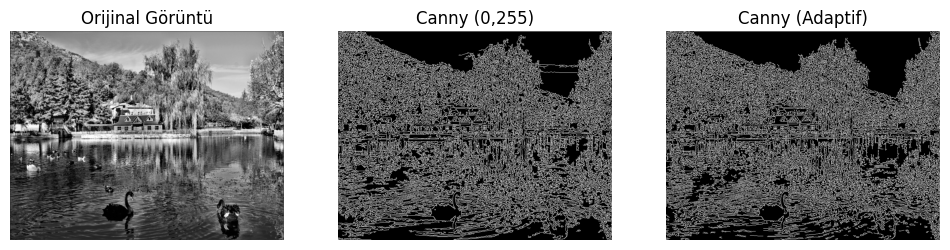

Bulanık Görüntü Medyan Değer: 119.0
Bulanık Görüntü Alt Eşik: 79
Bulanık Görüntü Üst Eşik: 158


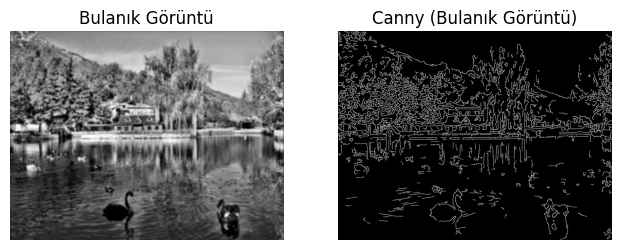

In [18]:
import cv2  
import matplotlib.pyplot as plt 
import numpy as np 

img = cv2.imread("kugulu.jpg", 0)  # 0 parametresi, görüntüyü gri tonlamalı (grayscale) okur
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  # 1 satır, 3 sütunluk bir düzen içinde 1. sıraya yerleştir
plt.imshow(img, cmap="gray")  # Görüntüyü gri tonlamalı olarak göster
plt.axis("off")  
plt.title("Orijinal Görüntü") 


# Canny Kenar Algılama - İlk deneme (eşik değerleri manuel olarak verildi)
edges = cv2.Canny(image=img, threshold1=0, threshold2=255) # HER ŞEYİ ÇIKARIYOR ABİ 
plt.subplot(1, 3, 2)  
plt.imshow(edges, cmap="gray")  
plt.axis("off")
plt.title("Canny (0,255)")



med_val = np.median(img)  # Görüntünün medyan (orta değer) piksel yoğunluğunu hesaplar
print("Medyan Değer:", med_val)
mean_val = np.mean(img)  # Görüntünün ortalama piksel yoğunluğunu hesaplar
print("Ortalama Değer:", mean_val)

# Canny için adaptif eşik değerleri hesaplama
low = int(max(0, (1 - 0.33) * med_val))  # Alt eşik değeri
high = int(min(255, (1 + 0.33) * med_val))  # Üst eşik değeri
print("Alt Eşik:", low)
print("Üst Eşik:", high)


edges = cv2.Canny(image=img, threshold1=low, threshold2=high)
plt.subplot(1, 3, 3)  
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Canny (Adaptif)")

plt.show()  

# Blurlama işlemi
blurred_img = cv2.blur(img, ksize=(5, 5))  # 5x5 boyutunda bulanıklaştırma filtresi uygula

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(blurred_img, cmap="gray")
plt.axis("off")
plt.title("Bulanık Görüntü")

med_val = np.median(blurred_img)
print("Bulanık Görüntü Medyan Değer:", med_val)
low = int(max(0, (1 - 0.33) * med_val))
high = int(min(255, (1 + 0.33) * med_val))
print("Bulanık Görüntü Alt Eşik:", low)
print("Bulanık Görüntü Üst Eşik:", high)

# Blurlanmış görüntü için Canny kenar tespiti
denoised_edges = cv2.Canny(image=blurred_img, threshold1=low, threshold2=high)

plt.subplot(1, 3, 2)
plt.imshow(denoised_edges, cmap="gray")
plt.axis("off")
plt.title("Canny (Bulanık Görüntü)")

plt.show()  


## <span style="background-color: yellow;">Köşe Algılama </span>

Köşe algılama, dijital görüntülerde keskin yön değişimlerini tespit etmek için kullanılan bir görüntü işleme tekniğidir. Köşeler, iki veya daha fazla kenarın birleştiği noktalar olarak tanımlanır. Köşeler, nesnelerin tanımlanması ve takip edilmesi için önemli özelliklerdir.

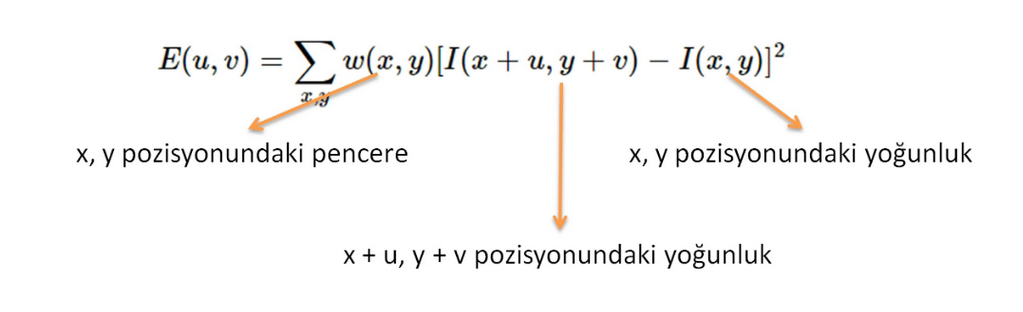

### Köşe Algılama Algoritmaları

- Harris Köşe Algılama (Harris Corner Detection)
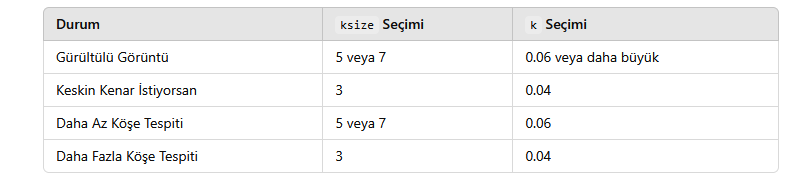
- Shi-Tomasi Köşe Algılama
- FAST Algoritması (Features from Accelerated Segment Test)
- SIFT ve SURF Algoritmaları (Özellik Eşleme İçin Kullanılan Yöntemler)


Görüntü Boyutu: (830, 1000)


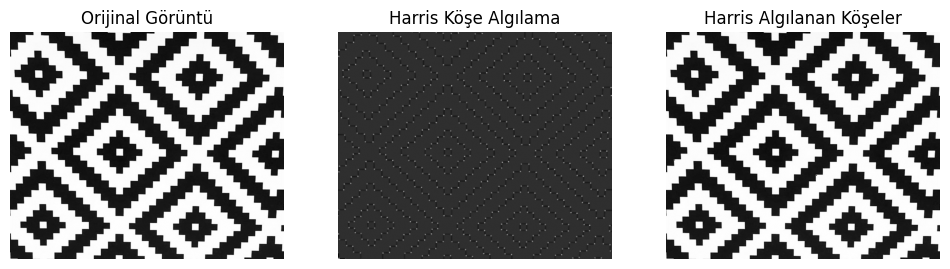

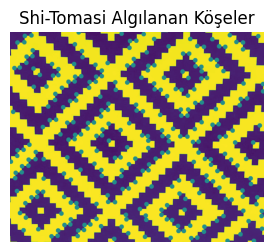

In [53]:
import cv2 
import matplotlib.pyplot as plt  
import numpy as np  


img = cv2.imread("corner.jpg", 0) 
img = np.float32(img)  # Görüntüyü float32 formatına çeviriyoruz (Harris algoritması için gereklidir)
print("Görüntü Boyutu:", img.shape)  
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  
plt.imshow(img, cmap="gray") 
plt.axis("off")  
plt.title("Orijinal Görüntü")  

# --- Harris Köşe Algılama ---
# Harris köşe tespiti uygulama
# blockSize = 6 -> Köşe tespiti için kullanılan komşuluk alanının boyutu
# ksize = 3 -> Sobel türevini hesaplamak için kullanılan çekirdek boyutu
# k = 0.04 -> Harris köşe tespiti için kullanılan serbest parametre

dst = cv2.cornerHarris(img, blockSize=6, ksize=3, k=0.04)
plt.subplot(1, 3, 2)  
plt.imshow(dst, cmap="gray")  
plt.axis("off")
plt.title("Harris Köşe Algılama")

# Harris sonucunu iyileştirmek için genişletme işlemi (dilate) uygulanır
# Böylece köşeler daha belirgin hale gelir
dst = cv2.dilate(dst, None)
# Köşeleri tespit etmek için belirlenen eşik değerini aşan noktalar işaretlenir
img[dst > 0.9 * dst.max()] = 1  # En yüksek değerin %90'sinden büyük olan noktaları 1 olarak işaretle
plt.subplot(1, 3, 3) 
plt.imshow(img, cmap="gray")  
plt.axis("off")
plt.title("Harris Algılanan Köşeler")

plt.show() 

# --- Shi-Tomasi Köşe Algılama ---
img = cv2.imread("corner.jpg", 0)  # Orijinal görüntüyü tekrar oku
img = np.float32(img)  # Harris algoritması gibi float32 formatına çevir

# Shi-Tomasi yöntemini kullanarak köşeleri belirleme
# 200 -> Maksimum tespit edilecek köşe sayısı
# 0.01 -> Kalite seviyesi (0-1 arasında olmalı, 1'e yaklaştıkça daha az köşe tespit edilir)
# 10 -> İki köşe arasında olması gereken minimum mesafe
corners = cv2.goodFeaturesToTrack(img, 300, 0.01, 10)
corners = np.int64(corners)  # Köşe koordinatlarını tam sayıya çevir

# Tespit edilen köşeleri görüntüye çizme
for i in corners:
    x, y = i.ravel()  # Köşe noktalarının x, y koordinatlarını al
    cv2.circle(img, (x, y), 9,  (125, 12, 255), cv2.FILLED)  # Köşeleri 9 piksellik bir daire ile işaretle

plt.figure(figsize=(12, 6))  
plt.subplot(2, 3, 1) 
plt.imshow(img)  
plt.axis("off")
plt.title("Shi-Tomasi Algılanan Köşeler")

plt.show()  


# <span style="background-color: yellow;">Kontur Algılama</span>

Kontur algılama, bir görüntüdeki nesnelerin sınırlarını belirlemek için kullanılan bir bilgisayarla görme tekniğidir. Konturlar, **aynı renk veya yoğunluğa sahip kesintisiz bölgelerin sınırlarını belirleyerek** şekil tanıma, nesne tespiti ve analiz gibi işlemlerde kullanılır.

**OpenCV 3.x sürümünde findContours üç değer döndürürdü: image, contours, hierarchy. Ancak 4.x sürümünde “orijinal görüntünün kopyasını” döndürme özelliği kaldırıldı ve yerine sadece contours, hierarchy döndürmektedir.**

```python

contours, hierarchy = cv2.findContours(
    image,      # Bu, kontur tespitinde kullanılacak tek kanallı (siyah-beyaz) bir görüntü
    # Renkli (3 kanallı) bir görüntü verilebilir ama findContours yine de tek kanalı kullanacaktır. Bu nedenle pratikte siyah-beyaz (1 kanal) kullanılması önerilir. Zaten ben hata aldım diğerinde. Ama kullanılabiliyormuş grayscale.
    mode,       # Contour retrieval mode (ör. RETR_EXTERNAL, RETR_TREE vb.)
    method,     # Contour approximation method (ör. CHAIN_APPROX_SIMPLE, CHAIN_APPROX_NONE)
    # opsiyonel offset parametresi de olabilir
)


```


##### <p style="background-color: lightblue; padding: 5px;">mode (Contour Retrieval Mode)</p>

- <p style="background-color: lightpink; padding: 5px;">cv2.RETR_EXTERNAL</p>
Sadece dış (harici) konturları bulur. Yani bir nesnenin dış çizgisini tespit eder, **içteki boşlukları veya delikleri dikkate almaz.**
- <p style="background-color: lightpink; padding: 5px;">cv2.RETR_LIST</p>
Tüm konturları bulur ancak herhangi bir ebeveyn‐çocuk (parent‐child) ilişkisi oluşturmaz. Yani hiyerarşi bilgisini (nesnenin içinde başka bir nesne var mı) tutmaz.
- <p style="background-color: lightpink; padding: 5px;">cv2.RETR_CCOMP</p>
Konturları 2 seviye halinde organize eder. Nesnenin dış sınırını bir katman, içindeki boşluk (delik) sınırlarını diğer katmanda tutar. İç içe geçmiş yapılarda bile “dış katman” ve “iç katman” olarak **2 seviye döner.**
- <p style="background-color: lightpink; padding: 5px;">cv2.RETR_TREE</p>
Tüm konturları tam hiyerarşi (ebeveyn, çocuk, torun...) bilgisiyle birlikte döndürür. ***Çok katmanlı iç içe nesneler varsa hangi kontur hangi konturun içinde yer alıyor, hepsi “ağaç” (tree) biçiminde tutulur.


##### <p style="background-color: lightblue; padding: 5px;">method (Contour Approximation Method)</p>

- <p style="background-color: lightpink; padding: 5px;">cv2.CHAIN_APPROX_NONE</p>

Bulunan kontur çizgisi üzerindeki tüm piksel noktaları (kenar boyunca her piksel) saklanır. Veri boyutu büyük olur.

- <p style="background-color: lightpink; padding: 5px;">cv2.CHAIN_APPROX_SIMPLE</p>

Kontur boyunca **gereksiz ara noktalar atılır** ve sadece köşe/büküm noktaları saklanır. Bu sayede çok daha az nokta ile aynı kontur temsil edilir. Genellikle bu tercih edilir.

- <p style="background-color: lightpink; padding: 5px;">cv2.CHAIN_APPROX_TC89_L1 ve cv2.CHAIN_APPROX_TC89_KCOS</p>

Douglas‐Peucker benzeri algoritmalar kullanarak konturu “daha da” sadeleştiren ve pürüzsüzleştiren yaklaşımlardır.


```python

contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

```

##### <p style="background-color: lightblue; padding: 5px;">contours</p>

- Bulunan konturların bir listesi **(Python list)** döner. Her kontur, (N, 1, 2) boyutunda bir NumPy array olur; yani N adet [x, y] koordinatını içerir (2 boyutlu, her pikselin konumu).

##### <p style="background-color: lightblue; padding: 5px;">hierarchy</p>

- Konturların hiyerarşi bilgisini (ebeveyn/çocuk ilişkilerini) tutar. (1, N, 4) şekline sahip bir NumPy array döner. N: Bulunan kontur sayısı. Dört sütun (4 değer): [Next, Prev, First_Child, Parent]
- Next: Aynı hiyerarşi düzeyinde bir sonraki konturun indeksi (yoksa -1). 
- Prev: Aynı hiyerarşi düzeyinde bir önceki konturun indeksi (yoksa -1).
- First_Child: Bu konturun içinde bir kontur varsa onun indeksi (yoksa -1)
- Parent: Bu konturun hangi konturun içinde olduğunu gösterir (yoksa -1)

## Tipik Kullanım Akışı

##### <p style="background-color: yellow; padding: 5px;">BGR2GRAY --> cv2.THRESH_BINARY+cv2.THRESH_OTSU) | cv2.THRESH_BINARY --> Canny --> cv2.findContours()  --> harici/iç kontur ayrımı -->  cv2.drawContours() -->  anlık (moment) bilgilerini hesaplamak  </p>

99
(6, 1, 2)


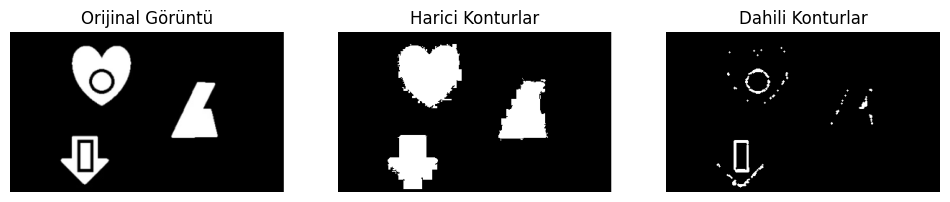

In [97]:
import cv2 
import matplotlib.pyplot as plt  
import numpy as np 

# Resmi içe aktar
img = cv2.imread("contour.png", 0)  
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 3, 1)  
plt.imshow(img, cmap="gray")  
plt.axis("off") 
plt.title("Orijinal Görüntü") 

# --- Kontur Tespiti ---
# Konturları ve hiyerarşiyi bul
# cv2.RETR_CCOMP -> Dış ve iç konturları ayırarak hiyerarşik bilgi sağlar
# cv2.CHAIN_APPROX_SIMPLE -> Gereksiz noktaları kaldırarak konturu optimize eder
contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

print(len(contours)) 
print(contours[15].shape)

# Harici (external) ve dahili (internal) konturlar için boş görüntüler oluştur
external_contour = np.zeros(img.shape, dtype=np.uint8)  # Dış konturlar için siyah boş görüntü
internal_contour = np.zeros(img.shape, dtype=np.uint8)  # İç konturlar için siyah boş görüntü


for i in range(len(contours)):
    # kontur harici bir kontur ise
    if hierarch[0][i][3] == -1:
        cv2.drawContours(external_contour, contours, i, 255, -1)  # Dış kontur beyaz olarak çizilir
    else:  # Eğer iç kontursa
        cv2.drawContours(internal_contour, contours, i, 255, -1)  # İç kontur beyaz olarak çizilir


plt.subplot(1, 3, 2) 
plt.imshow(external_contour, cmap="gray")
plt.axis("off")
plt.title("Harici Konturlar")

plt.subplot(1, 3, 3)
plt.imshow(internal_contour, cmap="gray")  
plt.axis("off")
plt.title("Dahili Konturlar")

plt.show() 


## <span style="background-color: yellow;">Renk ile Nesne Tespiti </span>

Renk ile nesne tespiti, **belirli bir renge sahip nesneleri görüntüde algılamak ve ayırmak** için kullanılan bir tekniktir. Genellikle HSV renk uzayı kullanılarak belirli renk tonları maskelenir ve ardından kontur analizi yapılarak nesneler belirlenir. RGB uzayı ışık değişimlerine duyarlıdır ve renkleri ayırt etmek zor olabilir. HSV (Hue, Saturation, Value) uzayı ise 

- Ton (Hue): Rengin türünü (kırmızı, mavi, yeşil vs.) belirler.
- Doygunluk (Saturation): Rengin ne kadar saf veya soluk olduğunu belirtir.
- Parlaklık (Value): Rengin parlaklığını ifade eder.

Bu nedenle, renk tespiti yaparken RGB yerine HSV kullanılır.

## HSV Renk Aralıkları

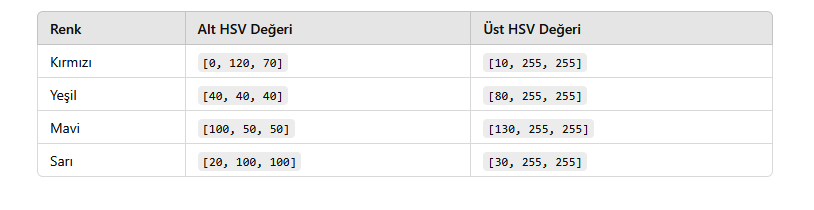

Belirli bir renkteki nesneyi tespit etmek için OpenCV’de şu adımlar izlenir:
+ Görüntü HSV uzayına çevrilir.
+ Belirli bir renk aralığında maskeleme yapılır.
+ Maskelenen nesneler üzerinde kontur analizi uygulanır.


In [136]:
import cv2 
import numpy as np  
from collections import deque  # deque veri yapısını içe aktar

# Maksimum takip edilecek noktaların sayısı (mavi ve kırmızı nesneler için ayrı ayrı tutuluyor)
buffer_size = 16
ptsBlue = deque(maxlen=buffer_size)  # Mavi nesnenin izini takip etmek için bir kuyruk
ptsRed = deque(maxlen=buffer_size)   # Kırmızı nesnenin izini takip etmek için bir kuyruk

# HSV (Hue, Saturation, Value) renk aralıkları belirleniyor
# Mavi renk aralığı (HSV formatında)
blueLower = (94, 80, 2)  # Alt sınır (daha düşük tonlar)
blueUpper = (126, 255, 255)  # Üst sınır (daha yüksek tonlar)

# Kırmızı renk aralığı (HSV formatında)
# Kırmızı iki farklı aralıkta bulunur (0-10 ve 170-180 aralığında)
redLower1 = (0, 120, 70)  # İlk kırmızı aralığı (düşük ton)
redUpper1 = (10, 255, 255)
redLower2 = (170, 120, 70)  # İkinci kırmızı aralığı (yüksek ton)
redUpper2 = (180, 255, 255)

# Kamerayı başlat
cap = cv2.VideoCapture(0)
cap.set(3, 960)  # Çözünürlük genişliği (960 piksel olarak ayarlanıyor)
cap.set(4, 480)  # Çözünürlük yüksekliği (480 piksel olarak ayarlanıyor)


fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Videoyu XVID formatında kaydetmek için kodek tanımlanıyor
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (960, 480))  # Video kaydı başlatılıyor


while True:
    success, imgOriginal = cap.read()  # Kameradan anlık görüntü alınıyor

    if success:  # Eğer görüntü alındıysa
        # Gaussian Blur uygulanıyor
        blurred = cv2.GaussianBlur(imgOriginal, (11, 11), 0)

        # Görüntüyü HSV renk uzayına dönüştürüyoruz (renk tespiti için daha uygun bir format)
        hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        cv2.imshow("HSV Image", hsv)  # HSV görüntüsünü ekranda gösteriyoruz

        # Mavi renk için maske oluşturuluyor
        maskBlue = cv2.inRange(hsv, blueLower, blueUpper)
        maskBlue = cv2.erode(maskBlue, None, iterations=2)  # Gürültüyü azaltmak için erozyon uygulanıyor
        maskBlue = cv2.dilate(maskBlue, None, iterations=2)  # Nesnenin daha belirgin olması için genişletme uygulanıyor
        cv2.imshow("Mask Mavi", maskBlue)

        # Kırmızı renk için maske oluşturuluyor (iki ayrı aralık birleştiriliyor)
        maskRed1 = cv2.inRange(hsv, redLower1, redUpper1)
        maskRed2 = cv2.inRange(hsv, redLower2, redUpper2)
        maskRed = cv2.bitwise_or(maskRed1, maskRed2)  # İki kırmızı maskesi birleştiriliyor
        maskRed = cv2.erode(maskRed, None, iterations=2)
        maskRed = cv2.dilate(maskRed, None, iterations=2)
        cv2.imshow("Mask Kirmizi", maskRed)

        # Mavi nesne konturlarını tespit et
        contoursBlue, _ = cv2.findContours(maskBlue.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        centerBlue = None  # Başlangıçta merkez noktası yok
        if len(contoursBlue) > 0:
            cB = max(contoursBlue, key=cv2.contourArea)  # En büyük konturu al
            rectB = cv2.minAreaRect(cB)  # Nesneye minimum alan kaplayan dikdörtgen oluştur
            ((xB, yB), (wB, hB), rotB) = rectB
            sBlue = "Mavi -> x:{}, y:{}, w:{}, h:{}, rot:{}".format(int(xB), int(yB), int(wB), int(hB), int(rotB))
            print(sBlue)
            boxB = cv2.boxPoints(rectB)
            boxB = np.int64(boxB)
            MB = cv2.moments(cB)
            centerBlue = (int(MB["m10"] / MB["m00"]), int(MB["m01"] / MB["m00"]))
            cv2.drawContours(imgOriginal, [boxB], 0, (0, 255, 255), 2)
            cv2.circle(imgOriginal, centerBlue, 5, (255, 0, 255), -1)
            ptsBlue.appendleft(centerBlue)
            for i in range(1, len(ptsBlue)):
                if ptsBlue[i - 1] is None or ptsBlue[i] is None:
                    continue
                cv2.line(imgOriginal, ptsBlue[i - 1], ptsBlue[i], (255, 0, 0), 3)

        # Kırmızı nesne konturlarını tespit et
        contoursRed, _ = cv2.findContours(maskRed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        centerRed = None
        if len(contoursRed) > 0:
            cR = max(contoursRed, key=cv2.contourArea)
            (xC, yC), radius = cv2.minEnclosingCircle(cR)
            sRed = "Kirmizi -> x:{}, y:{}, r:{}".format(int(xC), int(yC), int(radius))
            print(sRed)
            MR = cv2.moments(cR)
            centerRed = (int(MR["m10"] / MR["m00"]), int(MR["m01"] / MR["m00"]))
            if radius > 0:
                cv2.circle(imgOriginal, (int(xC), int(yC)), int(radius), (0, 255, 0), 2)
            cv2.circle(imgOriginal, centerRed, 5, (255, 0, 255), -1)
            ptsRed.appendleft(centerRed)
            for i in range(1, len(ptsRed)):
                if ptsRed[i - 1] is None or ptsRed[i] is None:
                    continue
                cv2.line(imgOriginal, ptsRed[i - 1], ptsRed[i], (0, 0, 255), 3)
        cv2.imshow("Orijinal Tespit", imgOriginal)
        out.write(imgOriginal)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
out.release()
cv2.destroyAllWindows()


Kirmizi -> x:403, y:451, r:33
Kirmizi -> x:386, y:438, r:39
Kirmizi -> x:377, y:430, r:40
Kirmizi -> x:369, y:425, r:41
Kirmizi -> x:366, y:422, r:42
Kirmizi -> x:370, y:419, r:43
Kirmizi -> x:377, y:416, r:43
Kirmizi -> x:375, y:411, r:43
Kirmizi -> x:371, y:407, r:43
Kirmizi -> x:363, y:402, r:43
Kirmizi -> x:354, y:399, r:44
Kirmizi -> x:341, y:395, r:44
Kirmizi -> x:329, y:392, r:45
Kirmizi -> x:318, y:388, r:45
Kirmizi -> x:305, y:385, r:44
Kirmizi -> x:291, y:383, r:44
Kirmizi -> x:276, y:382, r:44
Kirmizi -> x:261, y:381, r:44
Kirmizi -> x:247, y:380, r:43
Kirmizi -> x:232, y:379, r:43
Kirmizi -> x:217, y:378, r:42
Kirmizi -> x:208, y:379, r:42
Mavi -> x:203, y:537, w:4, h:4, rot:90
Kirmizi -> x:197, y:380, r:42
Kirmizi -> x:201, y:381, r:40
Kirmizi -> x:419, y:402, r:39
Kirmizi -> x:405, y:409, r:26
Kirmizi -> x:227, y:390, r:36
Kirmizi -> x:211, y:394, r:38
Kirmizi -> x:204, y:396, r:38
Kirmizi -> x:211, y:396, r:37
Kirmizi -> x:211, y:396, r:37
Kirmizi -> x:230, y:378, r:17
K

Mavi -> x:717, y:380, w:19, h:40, rot:81
Kirmizi -> x:328, y:400, r:44
Mavi -> x:715, y:380, w:19, h:40, rot:81
Kirmizi -> x:335, y:402, r:44
Mavi -> x:717, y:376, w:19, h:40, rot:81
Kirmizi -> x:339, y:403, r:45
Mavi -> x:718, y:371, w:22, h:39, rot:83
Kirmizi -> x:340, y:404, r:45
Mavi -> x:714, y:360, w:37, h:38, rot:84
Kirmizi -> x:339, y:403, r:45
Mavi -> x:706, y:356, w:39, h:39, rot:83
Kirmizi -> x:336, y:402, r:44
Mavi -> x:698, y:354, w:40, h:38, rot:87
Kirmizi -> x:335, y:402, r:44
Mavi -> x:684, y:353, w:41, h:28, rot:75
Kirmizi -> x:335, y:401, r:43
Mavi -> x:676, y:354, w:40, h:15, rot:75
Kirmizi -> x:335, y:400, r:42
Mavi -> x:676, y:351, w:40, h:14, rot:78
Kirmizi -> x:335, y:400, r:40
Mavi -> x:680, y:348, w:42, h:18, rot:83
Kirmizi -> x:337, y:401, r:39
Mavi -> x:684, y:345, w:41, h:24, rot:90
Kirmizi -> x:337, y:401, r:38
Mavi -> x:693, y:342, w:40, h:34, rot:84
Kirmizi -> x:338, y:403, r:37
Mavi -> x:697, y:340, w:41, h:38, rot:82
Kirmizi -> x:340, y:405, r:36
Mavi -

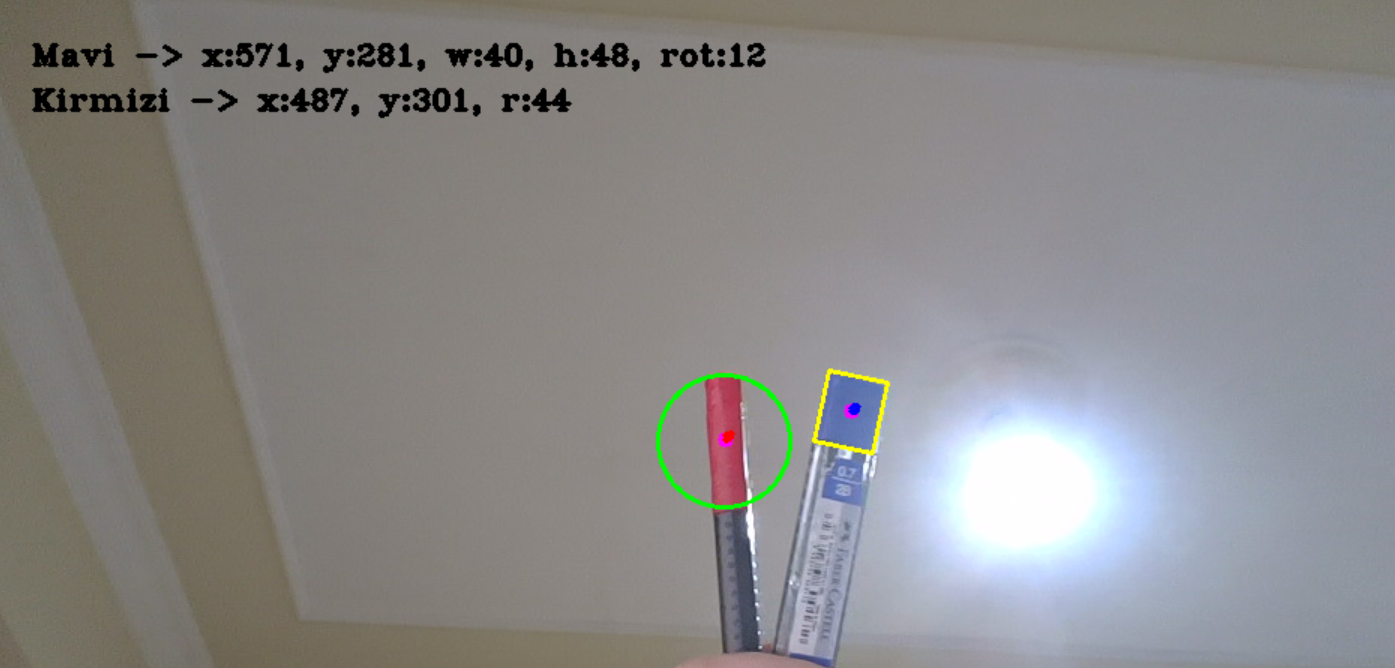

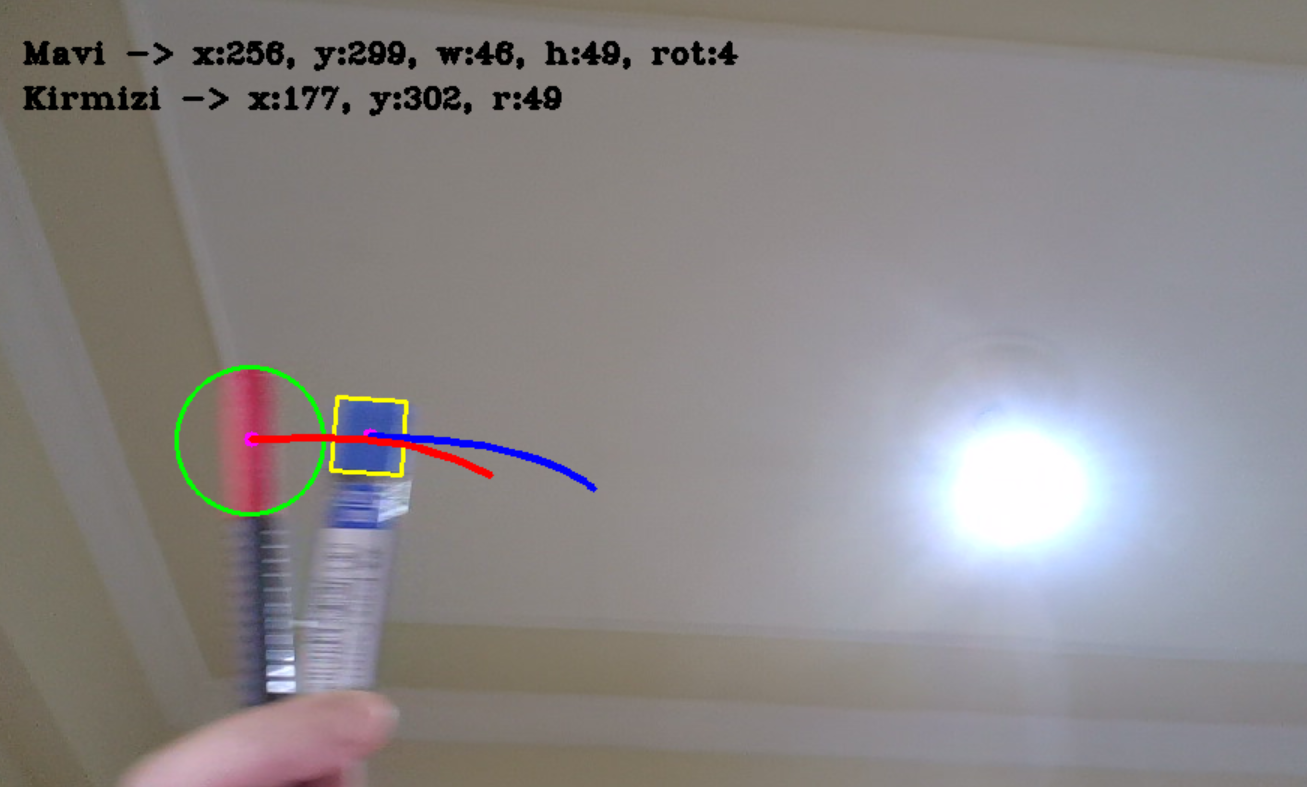